# Preprocess log file first by running the following script

## Change the logfilename

Example: `./preprocess_logs.sh 1533116055`

# Import Libraries

In [1]:
import sys
print(sys.executable)

/anaconda3/bin/python


In [2]:
import pandas
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import glob
from time import gmtime, strftime
from sklearn.linear_model import LinearRegression, Ridge

In [3]:
{log:strftime("%d%b %H:%M", gmtime(int(re.findall("\d+", log)[0]))) for log in glob.glob('logs/*-log')}

{'logs/dqn_0.20156279202652394-log': '01Jan 00:00',
 'logs/a2c_0.839309354318-log': '01Jan 00:00',
 'logs/dqn_0.8112342057798159-log': '01Jan 00:00',
 'logs/a2c_0.8587228232556535-log': '01Jan 00:00',
 'logs/dqn-pong-1534163610-log': '13Aug 12:33',
 'logs/a2c_0.291884179427754-log': '01Jan 00:00',
 'logs/a2c_0.5333673473209196-log': '01Jan 00:00',
 'logs/a2c_0.5250580183209552-log': '01Jan 00:00',
 'logs/dqn_0.8580312332051564-log': '01Jan 00:00',
 'logs/a2c_0.38985953554965636-log': '01Jan 00:00',
 'logs/a2c_0.8323747714184345-log': '01Jan 00:00',
 'logs/a2c_0.6565708838934593-log': '01Jan 00:00'}

In [29]:
glob.glob('logs/longdqn/*')

['logs/longdqn/dqn_0.8246659563481628-log',
 'logs/longdqn/dqn_0.4036237050247964-log',
 'logs/longdqn/dqn_0.all-log_qval.csv',
 'logs/longdqn/dqn_0.all-log_reward.csv',
 'logs/longdqn/dqn_0.6389490337149797-log',
 'logs/longdqn/dqn_0.19446710549615254-log',
 'logs/longdqn/dqn_0.all-log']

In [239]:
logfilename = 'dqn_0.all'
qvalue_filename = 'logs/originaldqn/'+logfilename+'-log_qval.csv'
reward_filename = 'logs/originaldqn/'+logfilename+'-log_reward.csv'

In [240]:
# logfilename = 'dqn_0.all'
# qvalue_filename = 'logs/longdqnmodified/'+logfilename+'-log_qval.csv'
# reward_filename = 'logs/longdqnmodified/'+logfilename+'-log_reward.csv'

In [241]:
# logfilename = 'dqn_0.all'
# qvalue_filename = 'logs/longdqn/'+logfilename+'-log_qval.csv'
# reward_filename = 'logs/longdqn/'+logfilename+'-log_reward.csv'

In [242]:
# epsilon_df = pandas.read_csv(epsilon_filename,
#                              names=["Step", "Epsilon"],
#                              dtype={'Step': np.uint32, 'Epsilon': np.float16})

In [243]:
qval_df = pandas.read_csv(qvalue_filename,
                          names=["Step", "QValue", "Loss"],
                          dtype={'Step': np.uint32, 'QValue': np.float16, 'Loss': np.float16})

In [244]:
reward_df = pandas.read_csv(reward_filename,
                            names=["Episode", "Reward", "EpisodeLength"],
                            dtype={'Episode': np.uint16, 'Reward': np.int8, 'EpisodeLength': np.uint16})

In [245]:
# epsilon_df.head()

In [246]:
qval_df.tail()

,Step,QValue,Loss
2997,2997000,1.483398,0.009003
2998,2998000,1.397461,0.012001
2999,2999000,1.511719,0.045013
3000,3000000,1.431641,0.075012
3001,3001000,1.483398,0.020996


In [247]:
reward_df.tail()

,Episode,Reward,EpisodeLength
1332,503,20,1653
1333,504,18,1851
1334,505,15,2366
1335,506,20,1751
1336,507,21,1727


# Q-values

In [248]:
# qval_df['Step'] = qval_df.index*4

In [249]:
qval_df.tail()

,Step,QValue,Loss
2997,2997000,1.483398,0.009003
2998,2998000,1.397461,0.012001
2999,2999000,1.511719,0.045013
3000,3000000,1.431641,0.075012
3001,3001000,1.483398,0.020996


In [265]:
rolling_qval = qval_df.QValue.rolling(10).mean()

Text(0.5,1,'qvalue')

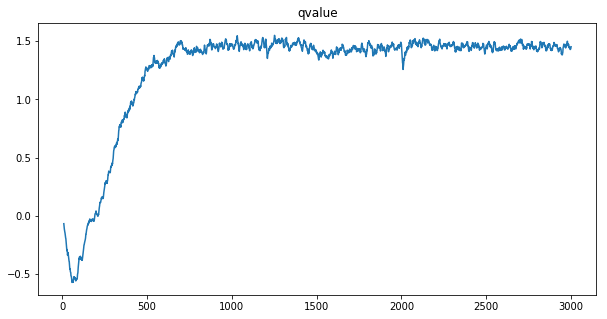

In [266]:
plt.figure(figsize=(10,5))
# seaborn.lineplot(data=qval_df[qval_df.Step % 2000 == 0], x="Step", y="QValue")
# plt.scatter(data=qval_df[qval_df.Step % 1000 == 0], x="Step", y="QValue", s=2)
# seaborn.lineplot(x=step_vals[::200], y=qval_pred)
plt.plot(rolling_qval)
plt.title('qvalue')

In [252]:
# lm = LinearRegression()
# lm.fit(step_vals[:,None], qval_df.Loss.values)
# loss_pred = lm.predict(step_vals[::200][:,None])

In [258]:
rolling_loss = qval_df.Loss.rolling(window=10).mean()

Text(0.5,1,'loss')

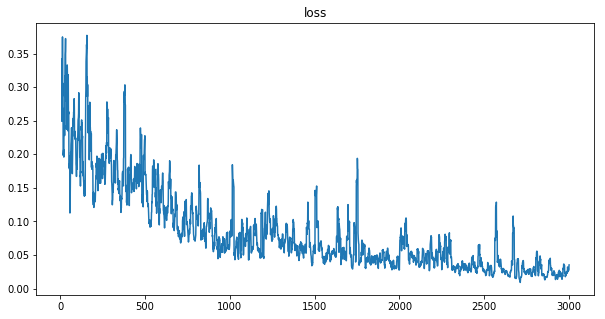

In [259]:
plt.figure(figsize=(10,5))
# seaborn.lineplot(data=qval_df[qval_df.Step % 2000 == 0], x="Step", y="Loss")
# plt.scatter(data=qval_df[qval_df.Step % 1000 == 0], x="Step", y="Loss", s=2)
# lp = seaborn.lineplot(x=step_vals[::200], y=loss_pred)
# lsp.axes.set_ylim(-0.1,1.2)
plt.plot(rolling_loss)
plt.title('loss')

# Reward Values

In [261]:
reward_df['Episode'] = reward_df.index

Text(0.5,1,'reward')

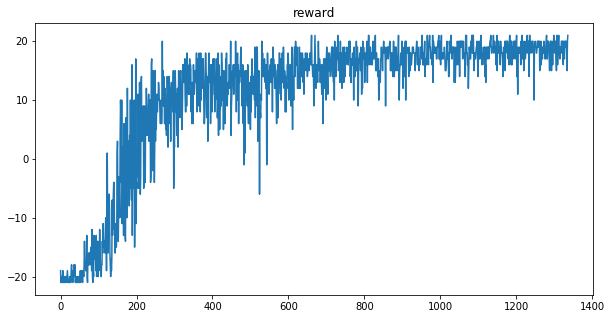

In [262]:
plt.figure(figsize=(10,5))
plt.plot(reward_df.Episode, reward_df.Reward)
plt.title('reward')

## Rewards averaged

In [267]:
# reward_df['bins'] = pandas.cut(reward_df.Episode, bins=200)
rollingmean_rewards = reward_df.Reward.rolling(10).mean()
rollingmean_eplength = reward_df.EpisodeLength.rolling(20).mean()

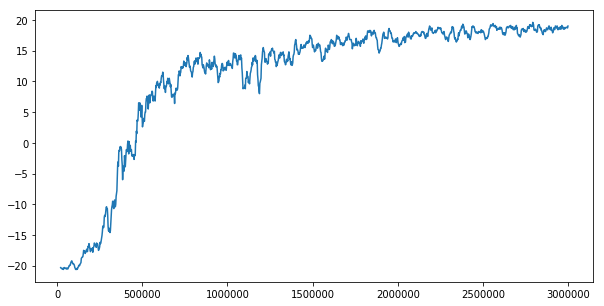

In [268]:
plt.figure(figsize=(10,5))
# plt.scatter(data=reward_df.groupby('bins').mean(), x="Episode", y="Reward")
plt.plot(np.linspace(0,3000000, len(rollingmean_rewards)), rollingmean_rewards)

## Episode Lengths

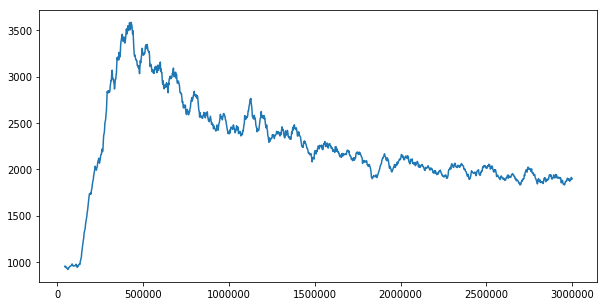

In [269]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,3000000, len(rollingmean_eplength)), rollingmean_eplength)

In [270]:
reward_df.to_csv('final_rewards_dqn')

# Epsilon Values

In [107]:
epsilon_df['Step'] = epsilon_df.index*4

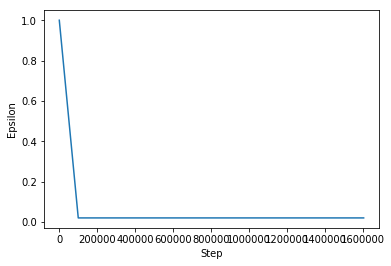

In [108]:
seaborn.lineplot(data=epsilon_df[epsilon_df.Step % 5000 == 0], x="Step", y="Epsilon")

# Learning Rate

In [109]:
# seaborn.lineplot(data=qval_df[qval_df.Step % 5000 == 0], x="Step", y="LearningRate")

In [110]:
qval_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402308 entries, 0 to 402307
Data columns (total 4 columns):
Step            402308 non-null int64
QValue          402308 non-null float16
Loss            402308 non-null float16
LearningRate    0 non-null float16
dtypes: float16(3), int64(1)
memory usage: 5.4 MB


In [111]:
epsilon_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402308 entries, 0 to 402307
Data columns (total 2 columns):
Step       402308 non-null int64
Epsilon    402308 non-null float16
dtypes: float16(1), int64(1)
memory usage: 3.8 MB


In [112]:
reward_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 4 columns):
Episode          729 non-null int64
Reward           729 non-null int8
EpisodeLength    729 non-null uint16
bins             729 non-null category
dtypes: category(1), int64(1), int8(1), uint16(1)
memory usage: 9.4 KB


In [113]:
qval_df.head()

,Step,QValue,Loss,LearningRate
0,0,-0.006001,1.001953,NaN
1,4,-0.016006,0.008003,NaN
2,8,-0.016998,0.014000,NaN
3,12,-0.008003,0.008003,NaN
4,16,-0.010002,0.007000,NaN


In [26]:
epsilon_df.head()

,Step,Epsilon
0,0,0.199951
1,1,0.199951
2,2,0.199951
3,3,0.199951
4,4,0.199951


In [27]:
# with open("logs/dqn-pong-1533116055-log") as f:
#     logtext = f.read()

In [28]:
# logtext[:1000]

In [29]:
# logtext = logtext.replace("INFO:root:", "")

In [30]:
# logtext = logtext.splitlines()

In [31]:
# logtext[:10]

In [32]:
# epsilon_logs = [b for b in logtext if "Epsilon:" in b]

In [33]:
# qval_logs = [b for b in logtext if "QValue:" in b]

In [34]:
# reward_logs = [b for b in logtext if "Reward:" in b]

In [35]:
# qval_logs = '\n'.join(qval_logs)
# epsilon_logs = '\n'.join(epsilon_logs)
# reward_logs = '\n'.join(reward_logs)

In [36]:
# epsilon_logs = re.sub("[a-zA-z:]", "", epsilon_logs)
# epsilon_logs = epsilon_logs.replace(":","").replace("Step","").replace("Epsilon","")

In [37]:
# qval_logs = qval_logs.replace(":","").replace("Step","").replace("QValue","").replace("Loss","").replace("LearningRate","")

In [38]:
# reward_logs = reward_logs.replace(":","").replace("Episode","").replace("Reward","")

In [39]:
# epsilon_df = pandas.read_csv(StringIO(epsilon_logs),
#                              names=["Step", "Epsilon"],
#                              dtype={'Step': np.uint32, 'Epsilon': np.float16})

In [40]:
# qval_df = pandas.read_csv(StringIO(qval_logs),
#                           names=["Step", "QValue", "Loss", "LearningRate"],
#                           dtype={'Step': np.uint32, 'QValue': np.float16, 'Loss': np.float16, 'LearningRate': np.float16})

In [41]:
# reward_df = pandas.read_csv(StringIO(reward_logs),
#                             names=["Episode", "Reward"],
#                             dtype={'Episode': np.uint16, 'Reward': np.int8})